<a href="https://colab.research.google.com/github/YunlouTeng/Airbnb-data-analytics/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import numpy as np

In [123]:
df = pd.read_csv('/content/drive/MyDrive/data_science_project/airbnb analysis/listings_boston.csv.gz')

In [124]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Clean the price

In [125]:
def get_price(x):
  y = x.replace("$",'').replace(',',"").replace(".","").strip()
  y = int(y)/100
  return y

In [126]:
df['price'] = df['price'].apply(lambda x: get_price(x))

In [158]:
df['price'][df['minimum_nights'] < 5].sort_values()

345        25.0
1402       30.0
3067       30.0
2704       32.0
3282       32.0
         ...   
1067     2507.0
1056     2692.0
3457     3947.0
1052     4192.0
1286    10000.0
Name: price, Length: 1674, dtype: float64

In [133]:
# remove price 0 
df = df[df['price'] != 0]

In [163]:
df['price'].sort_values(ascending = False).head(100)

1286    10000.0
458      5000.0
80       5000.0
1052     4192.0
324      3999.0
         ...   
400       590.0
462       588.0
2903      586.0
3225      586.0
1667      576.0
Name: price, Length: 100, dtype: float64

In [168]:
df[['price','beds','listing_url','availability_365']].sort_values('price', ascending = False)

,price,beds,listing_url,availability_365
1286,10000.0,1.0,https://www.airbnb.com/rooms/39772695,0
458,5000.0,3.0,https://www.airbnb.com/rooms/17138041,48
80,5000.0,2.0,https://www.airbnb.com/rooms/4553903,48
1052,4192.0,1.0,https://www.airbnb.com/rooms/33352470,265
324,3999.0,2.0,https://www.airbnb.com/rooms/13657486,0
...,...,...,...,...
3524,25.0,1.0,https://www.airbnb.com/rooms/4755586,184
1367,24.0,1.0,https://www.airbnb.com/rooms/41706168,344
1306,20.0,3.0,https://www.airbnb.com/rooms/40364138,0
3430,20.0,1.0,https://www.airbnb.com/rooms/773990108250892522,234


In [137]:
q3, q1 = np.percentile(df['price'], [75, 25])
IQR = q3 - q1

In [108]:
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

a = df['price'][(df['price'] < ul) | (df['price'] > ll)]

In [143]:
q1

85.0

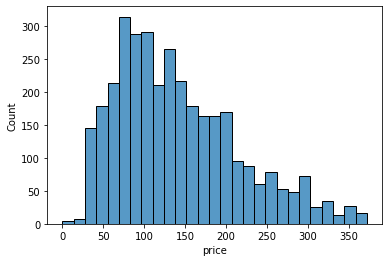

In [116]:
sns.histplot(df['price'][(df['price'] < ul)])